<a href="https://colab.research.google.com/github/Hananhere/Linear-Regression-and-Random-Forest/blob/main/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**

##**Load Data**


In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


##**Data Preparation**

###Data Separation as X and y

In [5]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [6]:
X = df.drop('logS', axis=1)

In [7]:
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data splitting

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 100 )

##**Model Building**

###**Linear Regression**


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

####**Evaluate Model Performance**


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [25]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()


In [31]:
lr_results.columns=['Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
lr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


###**Random Forest**

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth =2, random_state =100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [34]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

####Evaluate Model Performance

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [40]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns=['Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
rf_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


##**Model Comparison**


In [42]:
df_models = pd.concat([lr_results, rf_results], axis =0).reset_index(drop=True)

In [44]:
df_models

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


In [45]:
import matplotlib.pyplot as plt

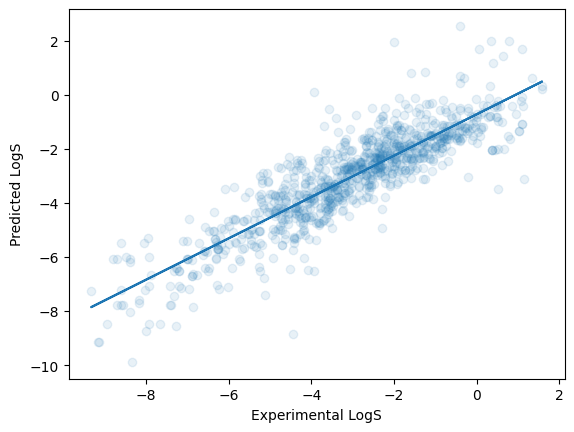

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and y_lr_train_pred are already defined

plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.1)  # Corrected typo: alpha=0.1

# Fit a linear regression model
x = np.polyfit(y_train, y_lr_train_pred, 1)

# Generate predicted values using the fitted model
y_pred = np.polyval(x, y_train)  # Corrected function: np.polyval

plt.plot(y_train, y_pred)  # Plot the fitted line using generated y_pred
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.show()  # Added plt.show() to display the plot
